## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left") 
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.duplicated(subset=["Mouse ID", "Timepoint"]).sum()


5

In [4]:
df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
check_ID = df[df["Mouse ID"] == "g989"]
check_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated = df[df.duplicated(subset = ["Mouse ID","Timepoint"])]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
clean_df = df.loc[df["Mouse ID"].isin(duplicated["Mouse ID"].unique()) == False]
clean_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [11]:
#df[df["Mouse ID"] == "g989"]

In [12]:
clean_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

print(f"The mean of the tumor volume is {mean_tumor_vol}")
print(f"The median of the tumor volume is {median_tumor_vol}")
print(f"The variance of the tumor volume is {var_tumor_vol}")
print(f"The standard deviation of the tumor volume is {std_tumor_vol}")
print(f"The SEM of the tumor volume is {sem_tumor_vol}")

The mean of the tumor volume is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median of the tumor volume is Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
The variance of the tumor volume is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
The standard deviation of the tumor volume is 

In [14]:
summary_stats = pd.DataFrame({"Mean": mean_tumor_vol, "Median": median_tumor_vol, "Variance": var_tumor_vol,
                             "Standard Deviation": std_tumor_vol, "SEM": sem_tumor_vol})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
total_tumor = clean_df["Tumor Volume (mm3)"]

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_groupby = clean_df.groupby("Drug Regimen")
summary_stats2 = single_groupby.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

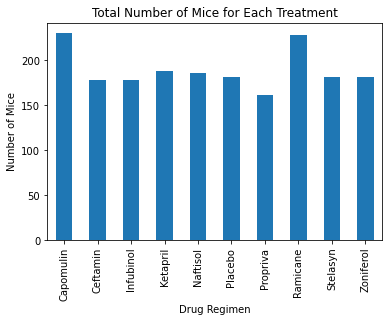

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice for Each Treatment")

plt.savefig("Bar Plot 1")
plt.show()

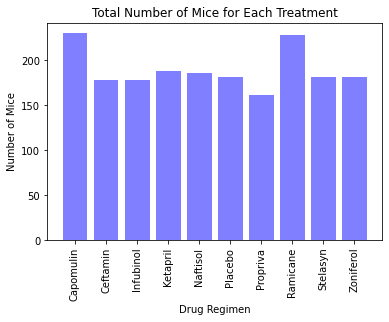

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#make sure to re-arrange the x-axis labels vertically
plt.bar(mice_count.index.values, mice_count.values, color="b", alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice for Each Treatment")

plt.savefig("Bar Plot 2")
plt.show()

In [19]:
#gender_group = clean_df.groupby(["Sex"])
gender_group_count = clean_df["Sex"].value_counts()
gender_group_count.head()
#gender_group_df = pd.DataFrame(gender_group.size())
#gender_group_df

Male      958
Female    922
Name: Sex, dtype: int64

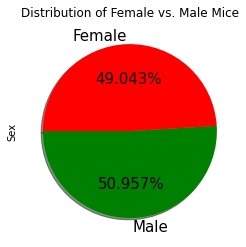

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group_count.plot(kind="pie", y="Sex", startangle=180, autopct="%1.3f%%", 
                        shadow=True, fontsize = 15, colors = ["green", "red"], 
                        legend=False)
plt.title("Distribution of Female vs. Male Mice")
plt.savefig("pie chart 1")
plt.show()

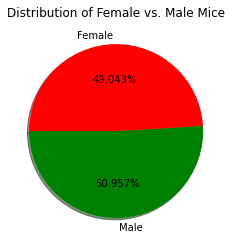

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_group_count.values, labels=gender_group_count.index.values, colors=["green", "red"], 
        autopct="%1.3f%%", shadow=True, startangle=180)
plt.title("Distribution of Female vs. Male Mice")
plt.savefig("pie chart 2")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, last_timepoint, on=["Mouse ID", "Timepoint"], how="right")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    find_drugs = merge_df.loc[merge_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
    print([drug, "Tumor Volume (mm3)[tumor_vol]"])

['Capomulin', 'Tumor Volume (mm3)[tumor_vol]']
['Ramicane', 'Tumor Volume (mm3)[tumor_vol]']
['Infubinol', 'Tumor Volume (mm3)[tumor_vol]']
['Ceftamin', 'Tumor Volume (mm3)[tumor_vol]']


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# add subset
for drug in treatments:
    find_drugs = merge_df.loc[merge_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(find_drugs)

    quartiles = find_drugs.quantile([.25, .5, .75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    iqr = Q3 - Q1
    
    print(drug)
    print(f"The lower quartile: {Q1}")
    print(f"The upper quartile: {Q3}")
    print(f"The interquartile: {iqr}")

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    print(f"The Lower bound: {lower_bound}")
    print(f"The upper bound: {upper_bound}")
    
    outliers = find_drugs.loc[(find_drugs < lower_bound) | 
                              (find_drugs > upper_bound)]
    print(f"{drug} has outliers: {outliers}")
    

Capomulin
The lower quartile: 32.37735684
The upper quartile: 40.1592203
The interquartile: 7.781863460000004
The Lower bound: 20.70456164999999
The upper bound: 51.83201549
Capomulin has outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
The lower quartile: 31.56046955
The upper quartile: 40.65900627
The interquartile: 9.098536719999998
The Lower bound: 17.912664470000003
The upper bound: 54.30681135
Ramicane has outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
The lower quartile: 54.04860769
The upper quartile: 65.52574285
The interquartile: 11.477135160000003
The Lower bound: 36.83290494999999
The upper bound: 82.74144559000001
Infubinol has outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
The lower quartile: 48.72207785
The upper quartile: 64.29983003
The interquartile: 15.577752179999997
The Lower bound: 25.355449580000002
The upper bound: 87.66645829999999
Ceftamin has outliers: Series([], Name: Tumor Volume 

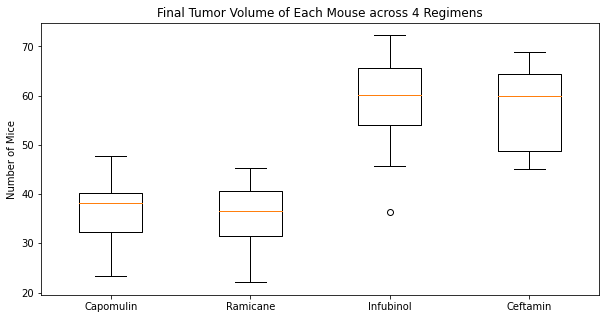

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,5))

# Set title/labels
plt.title("Final Tumor Volume of Each Mouse across 4 Regimens")
plt.ylabel("Number of Mice")

# Create boxplot
plt.boxplot(tumor_vol, labels=treatments)
plt.savefig("Box Plot for 4 Regimens")
plt.show()

## Line and Scatter Plots

In [26]:
timepoint_capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
line_plots = timepoint_capomulin.loc[timepoint_capomulin["Mouse ID"] == "s185",:]
line_plots.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


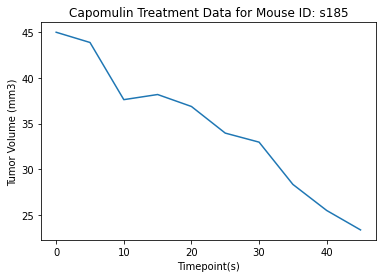

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = line_plots["Timepoint"]
y_axis = line_plots["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint(s)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Data for Mouse ID: s185")

plt.savefig("Line Chart - Capomulin Treatment for Mouse [s185]")
plt.show()

In [28]:
avg_tumor = timepoint_capomulin.groupby(["Mouse ID"]).mean()
avg_tumor.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


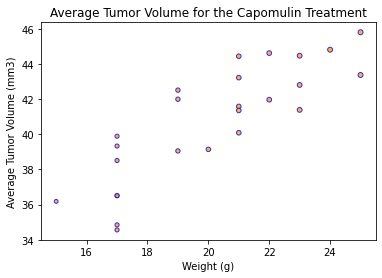

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = avg_tumor["Weight (g)"]
plt.scatter(x=x_axis, y=avg_tumor["Tumor Volume (mm3)"], marker="o", 
            facecolors="orange", edgecolors="blue", s=x_axis, alpha=0.8)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Average Tumor Volume for the Capomulin Treatment")

plt.savefig("scatterplot_average_tumor_vol")
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.7088568047708717


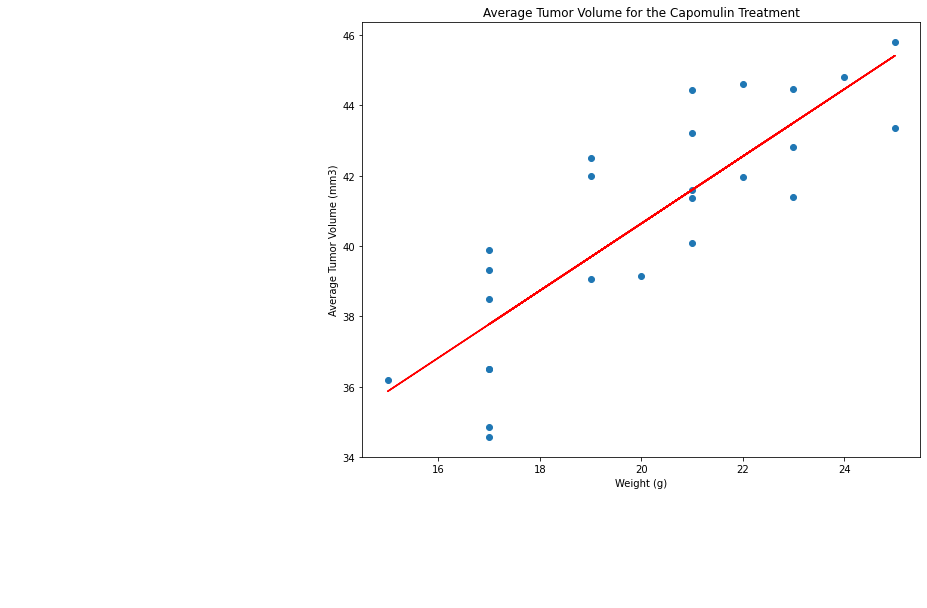

In [31]:
# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume for the Capomulin Treatment")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatterplot_average_tumor_vol")
plt.show()